In [88]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import cufflinks as cf
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [89]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [90]:
# 1) Alcohol 　＝＞アルコール 
# 2) Malic acid 　＝＞ リンゴ酸 
# 3) Ash => 灰 （土壌関係？）
# 4) Alcalinity of ash => 灰のアルカリ度
# 5) Magnesium => マグネシウム 
# 6) Total phenols => 総フェノール 
# 7) Flavanoids => フラボノイド 
# 8) Nonflavanoid phenols => 非フラバノイドフェノール
# 9) Proanthocyanins => プロ アントシアン 
# 10)Color intensity => 色の濃さ 
# 11)Hue =>  色相 
# 12)OD280/OD315 of diluted wines => 希釈ワインのOD280 / OD315 
# 13)Proline => プロリン （アミノ酸の一種）

In [91]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [92]:
wine.target_names
#3種類のワイン

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

<p>Clear condition</p>

<p>データから３種類のワインを分類する</p>

In [94]:
#標準化　＝＞ 決定木
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

std = StandardScaler()
X = std.fit_transform(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
#決定木の可視化
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, filled =True, rounded = True, class_names =['class0', 'class1', 'class2'],
                          feature_names = ['Alcohol', 'Malic acid','Ash', 'Alcalinity of ash','Magnesium', 'Total phenols','Flavanoids','Nonflavanoid phenols',
                                         'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'], out_file=None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree2.png')

True

In [98]:
y_pred = tree.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

In [99]:
from sklearn.metrics import accuracy_score
#正解率
accuracy_score(y_pred, y_test)

0.9444444444444444

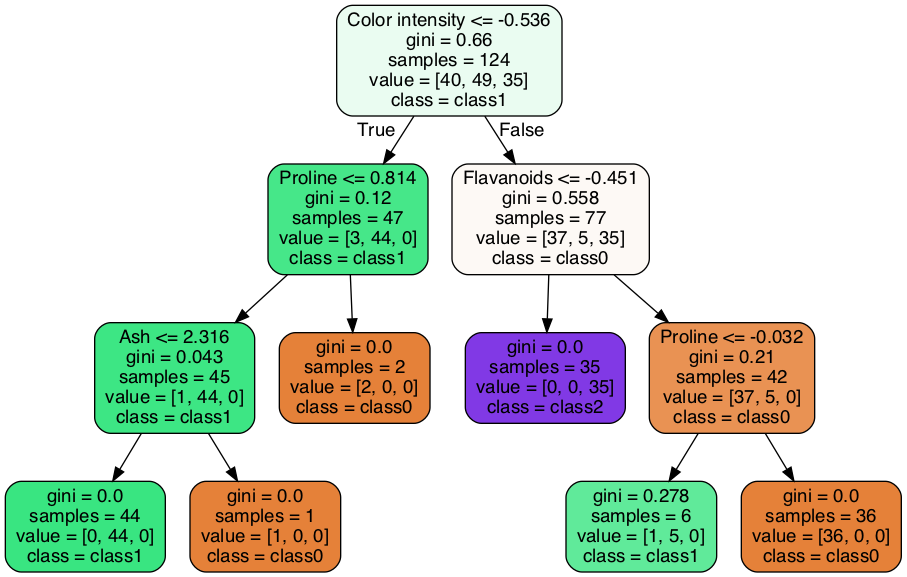

In [107]:
from IPython.display import Image

Image(graph.create_png())

In [108]:
from mlxtend.plotting import plot_decision_regions

In [111]:
tree.score(X_test, y_test)

0.9444444444444444

In [116]:
an = 0
for i,j in zip(tree.predict(X_test), y_test.reshape(-1,1)):
    if i == j:
        print(i,j,"OK")
    else:
        print(i,j,"NG")
        an += 1
print(an)

0 [0] OK
2 [2] OK
1 [1] OK
0 [0] OK
1 [1] OK
1 [1] OK
0 [0] OK
2 [2] OK
1 [1] OK
1 [1] OK
2 [2] OK
2 [2] OK
0 [0] OK
1 [1] OK
2 [2] OK
1 [1] OK
0 [0] OK
0 [0] OK
2 [1] NG
0 [0] OK
1 [1] OK
0 [0] OK
1 [0] NG
1 [1] OK
1 [1] OK
1 [1] OK
1 [1] OK
1 [1] OK
1 [1] OK
2 [2] OK
0 [0] OK
0 [0] OK
1 [1] OK
0 [0] OK
0 [0] OK
0 [0] OK
2 [2] OK
1 [1] OK
1 [1] OK
2 [2] OK
1 [0] NG
0 [0] OK
1 [1] OK
1 [1] OK
1 [1] OK
0 [0] OK
2 [2] OK
1 [1] OK
2 [2] OK
0 [0] OK
2 [2] OK
2 [2] OK
0 [0] OK
2 [2] OK
3


In [125]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train, y_train)
X_test_pca = pca.fit_transform(X_test)

In [126]:
tree.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [138]:


y_pred = tree.predict(X_test_pca) #よくない

print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))
print(y_pred)

Accuracy: 0.019
[1 1 2 1 0 2 1 1 0 0 1 1 1 2 1 0 1 1 0 2 2 0 1 0 0 0 0 0 0 1 2 1 0 1 2 2 1
 0 0 1 2 1 0 0 0 1 1 2 1 1 1 1 2 1]
